# **Customer Segmentation Using KMeans Clustering**

### **Problem Statement**

A retail store wants to get insights about its customers. And then build a system that can cluster customers into different groups.

Customer segmentation is simply grouping customers with similar characteristics. These characteristics include geography, demography, behavioural, purchasing power, situational factors, personality, lifestyle, psychographic, etc. The goals of customer segmentation are customer acquisition, customer retention, increasing customer profitability, customer satisfaction, resource allocation by designing marketing measures or programs and improving target marketing measures.

### **Importing all the necessary Libraries**

In [ ]:
import numpy as np
import pandas as pd

# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score

### **Loading the Data**

In [ ]:
!pip install kaggle
from google.colab import drive
drive.mount('/content/drive')
!mkdir ~/.kaggle
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/kaggle.json
!kaggle datasets download -d vjchoudhary7/customer-segmentation-tutorial-in-python 
!unzip \*.zip  && rm *.zip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
  0% 0.00/1.55k [00:00<?, ?B/s]
100% 1.55k/1.55k [00:00<00:00, 1.50MB/s]
Archive:  customer-segmentation-tutorial-in-python.zip
  inflating: Mall_Customers.csv      


In [ ]:
df = pd.read_csv("Mall_Customers.csv") # loads the csv file into a pandas dataframe

### **Understanding the Data**

In [ ]:
df.head() # returns the first 5 rows

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### **Exploratory Data Analysis (EDA)**

In [ ]:
df.shape # retuns the number of rows and columns in the dataset.

(200, 5)

In [ ]:
# Looking for null or missing values and Checking data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
# Descriptive statistics
df.describe() # returns the descriptive statistics of the dataset.

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
# Looking for duplicated values
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
195    False
196    False
197    False
198    False
199    False
Length: 200, dtype: bool

In [ ]:
# Find correlation of columns.
df.corr()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


### **Data Vizualization**

### **Gender Analysis**

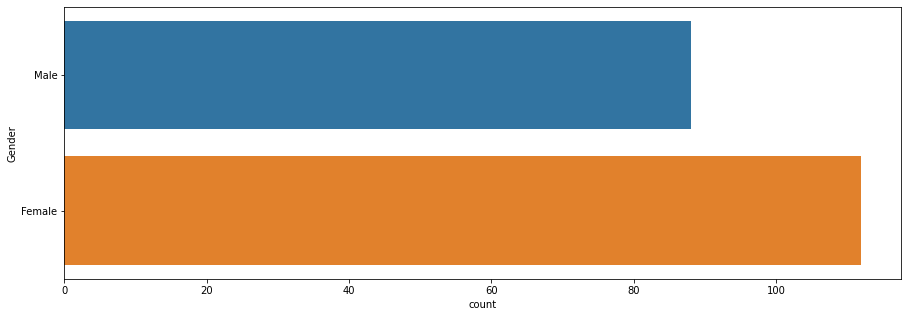

In [ ]:
plt.figure(figsize=(15, 5))
sns.countplot(y='Gender', data=df)

### **Violin Plot**

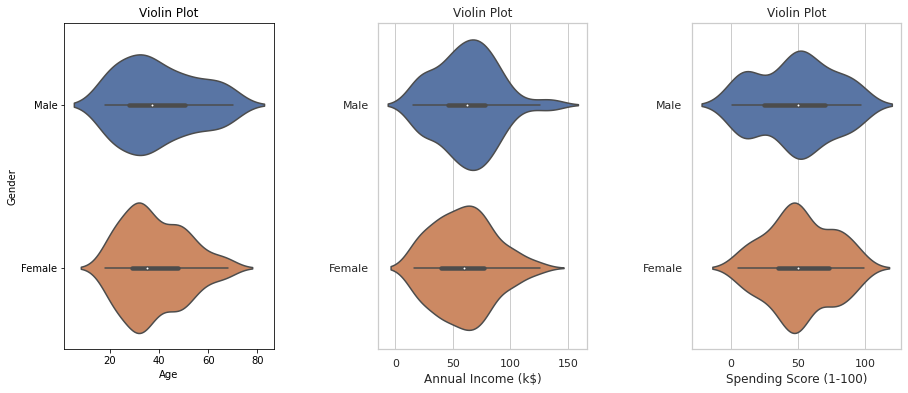

In [ ]:
plt.figure(1, figsize=(15,6))
n=0
for cols in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
  n += 1
  plt.subplot(1, 3, n)
  sns.set(style='whitegrid')
  plt.subplots_adjust(hspace=0.5, wspace = 0.5)
  sns.violinplot(x = cols, y = 'Gender', data=df)
  plt.ylabel('Gender' if n == 1 else '')
  plt.title('Violin Plot') 
plt.show()

### **Age Distribution:**

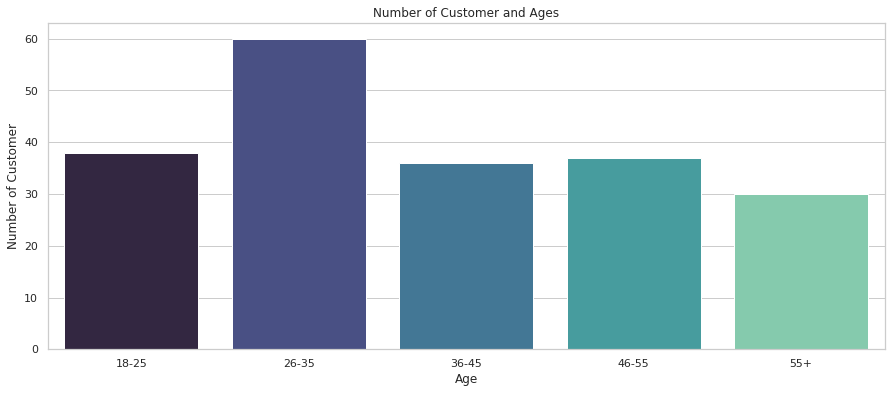

In [ ]:
age_18_25 = df.Age[(df.Age >= 18) & (df.Age <= 25)]
age_26_35 = df.Age[(df.Age >= 26) & (df.Age <= 35)]
age_36_45 = df.Age[(df.Age >= 36) & (df.Age <= 45)]
age_46_55 = df.Age[(df.Age >= 46) & (df.Age <= 55)]
age_55above = df.Age[df.Age >= 55]

agex = ["18-25","26-35","36-45","46-55","55+"]
agey = [len(age_18_25.values), len(age_26_35.values), len(age_36_45.values), len(age_46_55.values), len(age_55above.values)]

plt.figure(figsize=(15,6))
sns.barplot (x=agex, y=agey, palette="mako") 
plt.title("Number of Customer and Ages")
plt.xlabel("Age")
plt.ylabel("Number of Customer")
plt.show()

### **Spending Score Distribution**

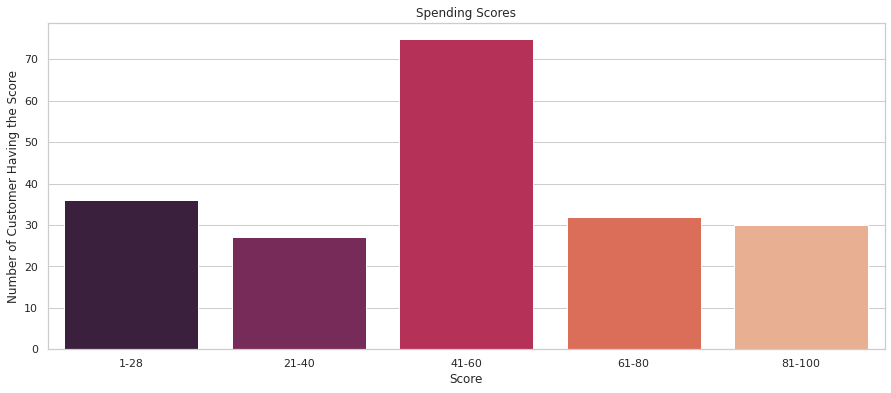

In [ ]:
ss_1_20 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 1) & (df["Spending Score (1-100)"] <= 20)]
ss_21_40 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 21) & (df["Spending Score (1-100)"] <= 40)]
ss_41_60 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 41) & (df["Spending Score (1-100)"] <= 60)]
ss_61_80 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 61) & (df["Spending Score (1-100)"] <= 80)]
ss_81_100 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 81) & (df["Spending Score (1-100)"] <= 100)]

ssx = ["1-28", "21-40", "41-60", "61-80", "81-100"]
ssy = [len(ss_1_20.values), len(ss_21_40.values), len(ss_41_60.values), len(ss_61_80.values), len(ss_81_100.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=ssx, y=ssy, palette="rocket") 
plt.title("Spending Scores")
plt.xlabel("Score")
plt.ylabel("Number of Customer Having the Score")
plt.show()

### **Annual Income Distribution:**

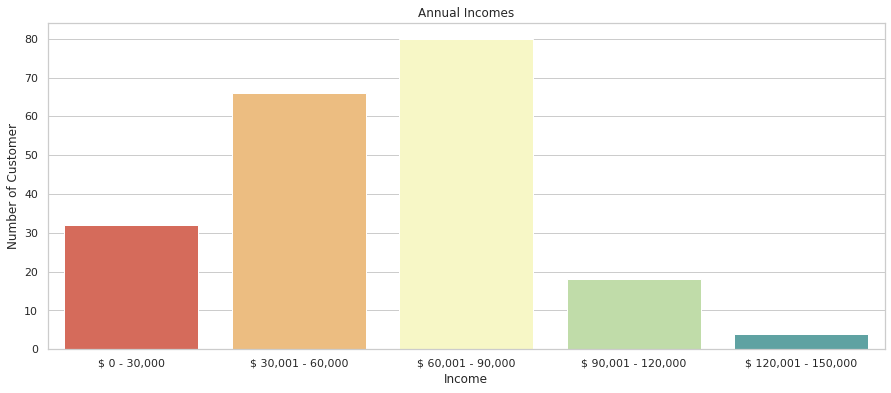

In [ ]:
ai0_30 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 0) & (df["Annual Income (k$)"] <= 30)]
ai31_60 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 31) & (df["Annual Income (k$)"] <= 60)]
ai61_90 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 61) & (df["Annual Income (k$)"] <= 90)]
ai91_120 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 91) & (df["Annual Income (k$)"] <= 120)]
ai121_150 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 121) & (df["Annual Income (k$)"] <= 150)]

aix = ["$ 0 - 30,000", "$ 30,001 - 60,000", "$ 60,001 - 90,000", "$ 90,001 - 120,000", "$ 120,001 - 150,000"]
aiy = [len(ai0_30.values), len(ai31_60.values), len(ai61_90.values), len(ai91_120.values), len(ai121_150.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=aix, y=aiy, palette="Spectral") 
plt.title("Annual Incomes")
plt.xlabel("Income")
plt.ylabel("Number of Customer")
plt.show()

### **Bivariate Analysis — Scatterplot**

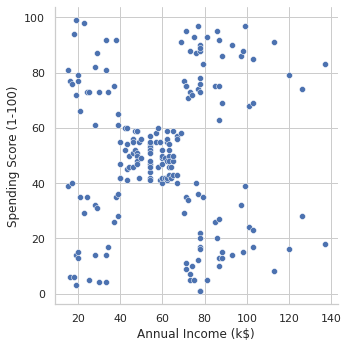

In [ ]:
sns.relplot(x="Annual Income (k$)", y="Spending Score (1-100)", data=df)

### **Feature Selection(Choosing the columns of interest for clustering)**

In [ ]:
# We take just the Annual Income and Spending score
X = df.iloc[:, [3, 4]].values
X.shape

(200, 2)

### **Feature Normalization**

In [ ]:
scaler = MinMaxScaler().fit(X) #It makes an object of the MinMaxScaler and then we fit it on our variable X. 
scaler.transform(X)

array([[0.        , 0.3877551 ],
       [0.        , 0.81632653],
       [0.00819672, 0.05102041],
       [0.00819672, 0.7755102 ],
       [0.01639344, 0.39795918],
       [0.01639344, 0.76530612],
       [0.02459016, 0.05102041],
       [0.02459016, 0.94897959],
       [0.03278689, 0.02040816],
       [0.03278689, 0.7244898 ],
       [0.03278689, 0.13265306],
       [0.03278689, 1.        ],
       [0.04098361, 0.14285714],
       [0.04098361, 0.7755102 ],
       [0.04098361, 0.12244898],
       [0.04098361, 0.79591837],
       [0.04918033, 0.34693878],
       [0.04918033, 0.66326531],
       [0.06557377, 0.28571429],
       [0.06557377, 0.98979592],
       [0.07377049, 0.34693878],
       [0.07377049, 0.73469388],
       [0.08196721, 0.04081633],
       [0.08196721, 0.73469388],
       [0.10655738, 0.13265306],
       [0.10655738, 0.82653061],
       [0.10655738, 0.31632653],
       [0.10655738, 0.6122449 ],
       [0.1147541 , 0.30612245],
       [0.1147541 , 0.87755102],
       [0.

### **Perform Elbow method to find optimal number of clusters**

In [ ]:
wcss = []

for i in range(1, 11):
  kmeans = KMeans(n_clusters=i, init="k-means++", random_state=42)
  kmeans.fit(X) # Finds the Kmeans to our data
  wcss.append(kmeans.inertia_) # This gives us the wcss values for each clusters

### **Plot an Elbow graph**

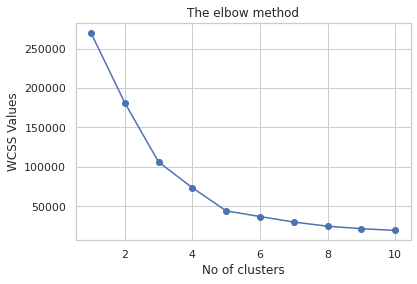

In [ ]:
plt.plot(range(1, 11), wcss, "bo-")
plt.title("The elbow method")
plt.xlabel('No of clusters')
plt.ylabel('WCSS Values')
plt.show()

From the above graph we can observe that between number of cluster = 4 to number of cluster = 6 there has been substantial decrease(an elbow) hence, we chose the K value for our dataset as 5.

### **Let's plot the silhouette score as a function of $k$:**

To select the best model, we will need a way to evaluate a K-Mean model's performance. Unfortunately, clustering is an unsupervised task, so we do not have the targets. But at least we can measure the distance between each instance and its centroid. This is the idea behind the _inertia_ metric:

In [ ]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)
                for k in range(1, 11)]
inertias = [model.inertia_ for model in kmeans_per_k]

In [ ]:
silhouette_score(X, kmeans.labels_)

0.45925273534781125

In [ ]:
silhouette_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_per_k[1:]]

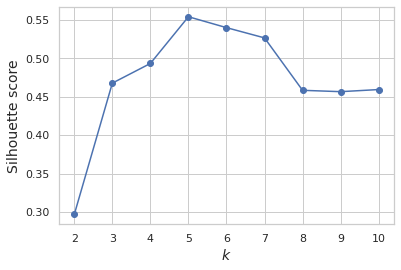

In [ ]:
plt.plot(range(2, 11), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.show()

### **Training a model using unsupervised learning algorithm(K-Means)**

In [ ]:
kmeans = KMeans(n_clusters = 5, init="k-means++", random_state = 42)
y_kmeans = kmeans.fit_predict(X)

### **Visualizing all the clusters**

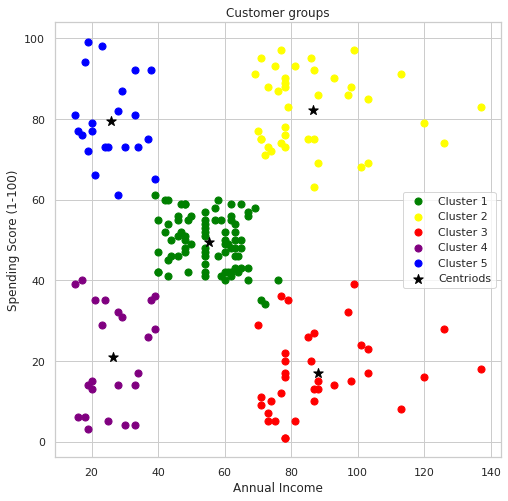

In [ ]:
plt.figure(figsize=(8,8))
plt.scatter(X[y_kmeans == 0,0], X[y_kmeans== 0,1], s=50, c='green', label='Cluster 1')
plt.scatter(X[y_kmeans == 4,0], X[y_kmeans== 4,1], s=50, c='yellow', label='Cluster 2')
plt.scatter(X[y_kmeans == 1,0], X[y_kmeans== 1,1], s=50, c='red', label='Cluster 3')
plt.scatter(X[y_kmeans == 2,0], X[y_kmeans== 2,1], s=50, c='purple', label='Cluster 4')
plt.scatter(X[y_kmeans == 3,0], X[y_kmeans== 3,1], s=50, c='blue', label='Cluster 5')
plt.scatter(kmeans.cluster_centers_ [:,0], kmeans.cluster_centers_ [:,1], s= 100, c='black', marker= '*', label='Centriods') #Plotting the centriods
plt.title('Customer groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()  

### **Business Insights**

The result of the analysis shows that the retail store customers can be group into 5 clusters or segments for targeted marketing.


**Cluster 1 (green):** These are average income earners with average spending scores. They are cautious with their spending at the store.


**Cluster 2 (yellow):** The customers in this group are high income earners and with high spending scores. They bring in profit. Discounts and other offers targeted at this group will increase their spending score and maximize profit.


**Cluster 3 (red):** This group of customers have a higher income but they do not spend more at the store. One of the assumption could be that they are not satisfied with the services rendered at the store. They are another ideal group to be targeted by the marketing team because they have the potential to bring in increased profit for the store.


**Cluster 4 (purple):** Low income earners with low spending score. I can assume that this is so because people with low income will tend to purchase less item at the store.


**Cluster 5 (blue):** These are low income earning customers with high spending 
scores. I can assume that why this group of customers spend more at the retail store despite earning less is because they enjoy and are satisfied with the services rendered at the retail store.